<a href="https://colab.research.google.com/github/arjunmenonv/EE5180/blob/main/EE18B104_PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: K means clustering


#### Perform k means clustering on the [r,g,b] pixel data of the image 'chilis.jpg' for k = 3 clusters. Terminate the algorithm when the cluster means do not change in an iteration. 

You can initialize the cluster centers as:
*   $c_1=[255, 0, 0]$
*   $c_2=[0,0,0]$
*   $c_3=[255,255,255]$

In order to visualise the output, replace all pixels corresponding to a cluster with it's mean value. Display this image along with the cluster means.

Code the algorithm from scratch without using libraries like scikit-learn.  




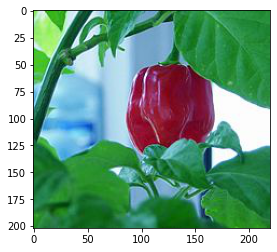

In [3]:
import numpy as np
import matplotlib.pyplot as plt
chilis_img = plt.imread('chilis.jpg')
plt.imshow(chilis_img)

Change in squared magnitude of cluster centres:
Iteration  1 :  51376.34743711004
Iteration  2 :  596.9674627180464
Iteration  3 :  1.3342811206813814
Iteration  4 :  0.02529955436121322
Iteration  5 :  7.972994735000062e-05
Iteration  6 :  0.0
Stable Cluster Centres: 
C1 =  [128.174  27.527  59.402]
C2 =  [ 37.561 128.072  63.472]
C3 =  [158.211 205.44  218.67 ]


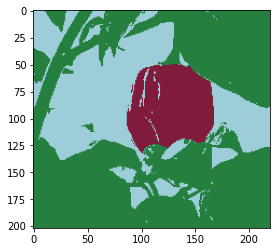

In [4]:
clusters = np.zeros(chilis_img.shape[0:2])
dist_c1 = np.zeros(chilis_img.shape[0:2])
dist_c2 = np.zeros(chilis_img.shape[0:2])
dist_c3 = np.zeros(chilis_img.shape[0:2])
c1 = np.array([255, 0, 0]); c2 = np.array([0, 0, 0]); c3 = np.array([255, 255, 255])
c_diff = np.sum((c1)**2 + (c2)**2 + (c3)**2)
print("Change in squared magnitude of cluster centres:")
for iter in range(10):
  dist_c1[:, :] = np.sum((chilis_img[:, :] - c1)**2, axis= 2)
  dist_c2[:, :] = np.sum((chilis_img[:, :] - c2)**2, axis= 2)
  dist_c3[:, :] = np.sum((chilis_img[:, :] - c3)**2, axis= 2)
  for i in range(chilis_img.shape[0]):
    for j in range(chilis_img.shape[1]):
      dist_ij = np.array([dist_c1[i,j], dist_c2[i,j], dist_c3[i,j]])
      clusters[i, j] = np.argmin(dist_ij)
  ix1 = np.where(clusters == 0);  ix2 = np.where(clusters == 1);   ix3 = np.where(clusters == 2)
  c1_new = np.array([np.mean(chilis_img[ix1[0], ix1[1], 0]), np.mean(chilis_img[ix1[0], ix1[1], 1]), \
        np.mean(chilis_img[ix1[0], ix1[1], 2])])
  c2_new = np.array([np.mean(chilis_img[ix2[0], ix2[1], 0]), np.mean(chilis_img[ix2[0], ix2[1], 1]), \
        np.mean(chilis_img[ix2[0], ix2[1], 2])])
  c3_new = np.array([np.mean(chilis_img[ix3[0], ix3[1], 0]), np.mean(chilis_img[ix3[0], ix3[1], 1]), \
        np.mean(chilis_img[ix3[0], ix3[1], 2])])
  c_diff = np.sum((c1_new - c1)**2 + (c2_new - c2)**2 + (c3_new - c3)**2)
  print("Iteration ", iter+1, ": ", c_diff)
  c1 = c1_new; c2 = c2_new; c3 = c3_new
  if c_diff < 1e-5:
    break
#
clust_img = np.zeros_like(chilis_img)
clust_img[ix1] = c1; clust_img[ix2] = c2; clust_img[ix3] = c3;
print("Stable Cluster Centres: ")
print("C1 = ", np.round(c1, 3))
print("C2 = ", np.round(c2, 3))
print("C3 = ", np.round(c3, 3))
plt.imshow(clust_img) 

#Problem 2: S.V.M

The Support Vector Machine(S.V.M) algorithm is to find the hyperplane in the N-dimensional space (N-Number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

##Problem 2, Part A: Linear S.V.M


Use dataset A (``data_prob2_parta.csv``)  for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into the training data (75%) and testing data(25%) randomly.




In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [73]:
inpA = pd.read_csv("data_prob2_parta.csv").values
features = inpA[:, 0:2]
labels = inpA[:, 2]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25, train_size = 0.75)
color_dict = {0: "blue", 1: "green"}

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels)

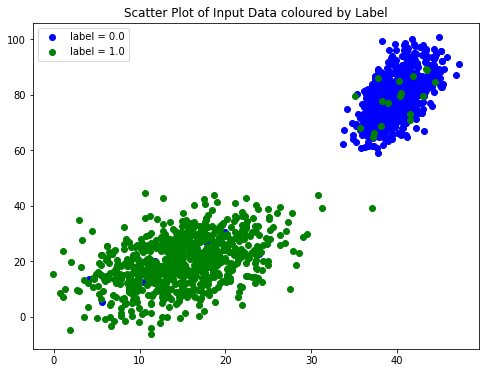

In [74]:
def scatter_data(x, y, color_dict):
  plt.figure(figsize=(8, 6))
  legend_vec = []
  for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(x[ix, 0], x[ix, 1], c= color_dict[g])
    legend_vec.append("label = "+ str(g))
  plt.legend(legend_vec)
  plt.title("Scatter Plot of Input Data coloured by Label")
scatter_data(Xtrain, ytrain, color_dict)

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [75]:
linSVM = SVC(kernel= 'linear')
linSVM.fit(Xtrain, ytrain)
print(linSVM.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Print the parameter and support vectors.


In [79]:
svec = linSVM.support_vectors_
svec_mag = np.zeros(svec.shape[0])
# Multiple Support Vectors are obtained as the data isn't perfectly linearly separable (soft SVM is used) 
svec_mag[:] = (svec[:, 0])**2 + (svec[:, 1])**2
'''
  The support vectors are ordered in ascending order on the basis of their L2 norm.
  The vectors around the middle index will correspond to the support vectors in the training set 
  closest to and on either side of the hyperplane. An offset of 10 from the middle index is used so that 
  the points chosen for plotting always lie on opposite sides regardless of the test-train split
'''
svec_mag = np.sort(svec_mag)
left_max = svec_mag[int(svec_mag.shape[0]/2)-10]
right_min = svec_mag[int(svec_mag.shape[0]/2) +10]
left_idx = np.where(((svec[:, 0])**2 + (svec[:, 1])**2 == left_max))[0]
right_idx = np.where(((svec[:, 0])**2 + (svec[:, 1])**2 == right_min))[0]
svec_left = svec[int(left_idx)]    
svec_right = svec[int(right_idx)]            
print("SVM Coefficients: ", coefs)
print("SVM Intercepts: ", intercepts)
print("Support Vectors: ", svec_left, svec_right)

SVM Coefficients:  [-0.05203219 -0.03548657]
SVM Intercepts:  3.2998119207076453
Support Vectors:  [17.52784072 42.30281053] [38.43174221 61.90969023]


Print the final accuracy on the test data.


In [80]:
acc_train = linSVM.score(Xtrain, ytrain)
acc_test = linSVM.score(Xtest, ytest)
print("Accuracy on Training Data: %0.4f" % acc_train)
print("Accuracy on Test Data: %0.4f" % acc_test)

Accuracy on Training Data: 0.9771
Accuracy on Test Data: 0.9733


Plot the scatter plot for the test data. On top of this scatter plot, plot the separating hyperplane and parallels to the hyperplane that pass through the support vectors.





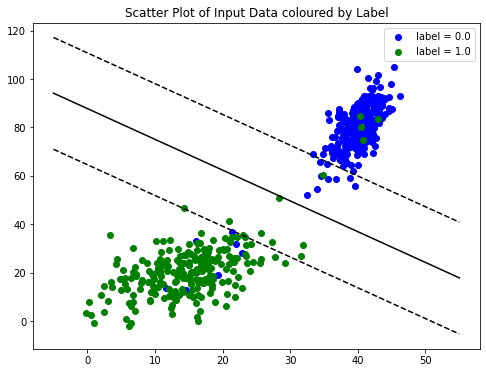

In [81]:
w = linSVM.coef_[0]
a = -w[0] / w[1]
x_lin = np.linspace(-5, 55)
y_lin = a * x_lin - (linSVM.intercept_[0]) / w[1]
#
y_right = a * x_lin + (svec_right[1] - a * svec_right[0])
y_left = a * x_lin + (svec_left[1] - a * svec_left[0])
scatter_data(Xtest, ytest, color_dict)
plt.plot(x_lin, y_lin, "k-")
plt.plot(x_lin, y_right, "k--")
plt.plot(x_lin, y_left, "k--")

##Problem 2, Part B: Non-linear S.V.M

 Use Dataset B (``data_prob2_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [85]:
inpB = pd.read_csv("data_prob2_partb.csv").values
features = inpB[:, 0:2]
labels = inpB[:, 2]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25, train_size = 0.75)
color_dict = {0: "blue", 1: "green"}

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).


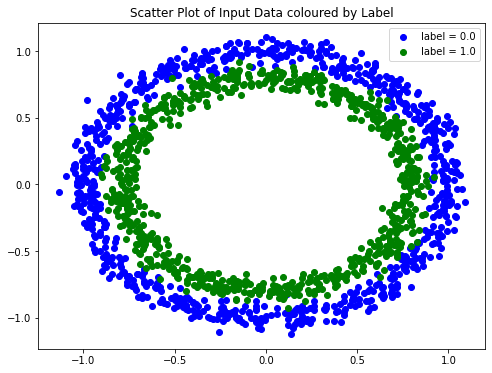

In [86]:
scatter_data(Xtrain, ytrain, color_dict)



Write the code for
choosing best hyperparameters for each of the kernel type.
In text cell after that report the following numbers:
Report the best kernel parameters, regularisation parametes, accuracy for ***linear***, ***RBF*** and ***poly*** kernels(Linear kernels has no kernel parameter).

Note: The scikit library can be used in this case.

In [93]:
p_gridLin = {'C' :  np.logspace(-2, 2, num= 5), 'kernel': ['linear']}
p_gridPoly = {'C' :  np.logspace(-1, 1, num= 3), 'gamma': np.logspace(-4, 0, num= 5), \
              'degree': [2, 3], 'kernel': ['poly']}
p_gridRBF = {'C' :  np.logspace(-1, 1, num= 3), 'gamma': np.logspace(-4, 0, num= 5), 'kernel': ['rbf']}
#
linSVM = GridSearchCV(SVC(), p_gridLin, refit = True)
linSVM.fit(Xtrain, ytrain)
lin_opt = linSVM.best_estimator_
# Best Param is found by Cross Validation on the Training Dataset
print("Best Parameter for Linear SVM: ", linSVM.best_params_)
print("Best Linear Estimator: ", lin_opt)
acc_train = linSVM.score(Xtrain, ytrain)
acc_test = linSVM.score(Xtest, ytest)
print("Accuracy on Training Data: %0.4f" % acc_train)
print("Accuracy on Test Data: %0.4f" % acc_test)
#
polySVM = GridSearchCV(SVC(), p_gridPoly, refit = True)
polySVM.fit(Xtrain, ytrain)
poly_opt = polySVM.best_estimator_
print("\nBest Parameter for Poly SVM: ", polySVM.best_params_)
print("Best Polynomial Estimator: ", poly_opt)
acc_train = polySVM.score(Xtrain, ytrain)
acc_test = polySVM.score(Xtest, ytest)
print("Accuracy on Training Data: %0.4f" % acc_train)
print("Accuracy on Test Data: %0.4f" % acc_test)
#
rbfSVM = GridSearchCV(SVC(), p_gridRBF, refit = True)
rbfSVM.fit(Xtrain, ytrain)
rbf_opt = rbfSVM.best_estimator_
print("\nBest Parameter for RBF SVM: ", rbfSVM.best_params_)
print("Best RBF Estimator: ", )
acc_train = rbfSVM.score(Xtrain, ytrain)
acc_test = rbfSVM.score(Xtest, ytest)
print("Accuracy on Training Data: %0.4f" % acc_train)
print("Accuracy on Test Data: %0.4f" % acc_test)


Best Parameter for Linear SVM:  {'C': 0.01, 'kernel': 'linear'}
Best Linear Estimator:  SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy on Training Data: 0.5060
Accuracy on Test Data: 0.4819

Best Parameter for Poly SVM:  {'C': 1.0, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}
Best Polynomial Estimator:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=1.0, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy on Training Data: 0.9797
Accuracy on Test Data: 0.9829

Best Parameter for RBF SVM:  {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best RBF Estimator: 
Accuracy on Training Data: 0.9790
Accuracy on Test Data: 0.9810


Report your observation in the given table:

Best Hyperparameters determined by GridSearch- the values vary slightly depending on the test-train split, although not significantly



Kernels | Linear | RBF | Poly
--- | --- | --- |---
Kernel Parameters |None  | $\gamma$ = 0.1| $\gamma$ = 1.0
Degree | None | None | 2
Regularization Parameters |  0.01| 10| 1.0
Accuracy | 0.4800 |  0.9810| 0.9829

Note: It was observed that degree 2 and degree 4 polynomials both show good performance for the polynomial kernel, while degree 3 polynomial kernel performs poorly. Depending on the test train split, one of the two even ordered polynomials would dominate. Since a lower order polynomial is more resilient to overfitting and reduces computation time, the 2nd order polynomial is preferred.





Plot the scatter plot for the test data.On top of this scatter plot, plot the decision regions for each of the kernels with their best fit

Text(0.5, 1.0, 'Optimal RBF SVM classifier')

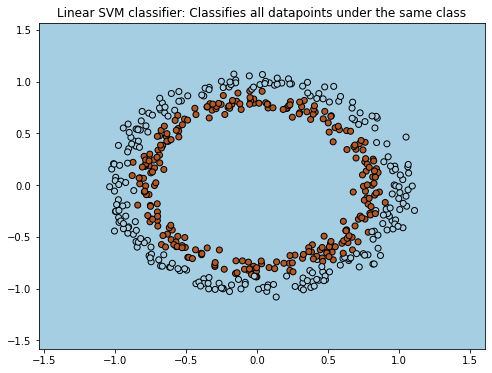

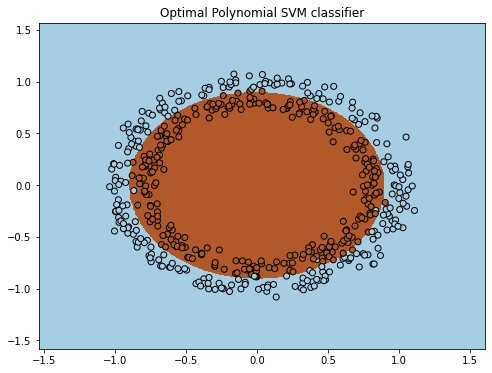

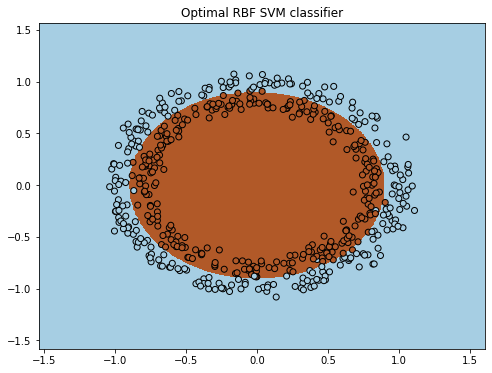

In [94]:
x_min, x_max = Xtest[:, 0].min() - .5, Xtest[:, 0].max() + .5
y_min, y_max = Xtest[:, 1].min() - .5, Xtest[:, 1].max() + .5
h = 5e-3  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xsamples = np.c_[xx.ravel(), yy.ravel()]
Z_lin = lin_opt.predict(Xsamples)
Z_poly = poly_opt.predict(Xsamples)
Z_rbf = rbf_opt.predict(Xsamples)
# Put the result into a color plot
Z_lin = Z_lin.reshape(xx.shape)
Z_poly = Z_poly.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)
plt.figure(figsize= (8, 6))
plt.pcolormesh(xx, yy, Z_lin, cmap=plt.cm.Paired)
#
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Linear SVM classifier: Classifies all datapoints under the same class")
#
plt.figure(figsize= (8, 6))
plt.pcolormesh(xx, yy, Z_poly, cmap=plt.cm.Paired)
#
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Optimal Polynomial SVM classifier")
#
plt.figure(figsize= (8, 6))
plt.pcolormesh(xx, yy, Z_rbf, cmap=plt.cm.Paired)
#
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Optimal RBF SVM classifier")

##Problem 2, Part C: Multiclass Classification

Use Dataset C (``data_prob3_partc.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [95]:
inpC = pd.read_csv("data_prob2_partc.csv").values
features = inpC[:, 0:2]
labels = inpC[:, 2]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25, train_size = 0.75)
color_dict_multi = {0: "blue", 1: "green", 2: "black"}

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

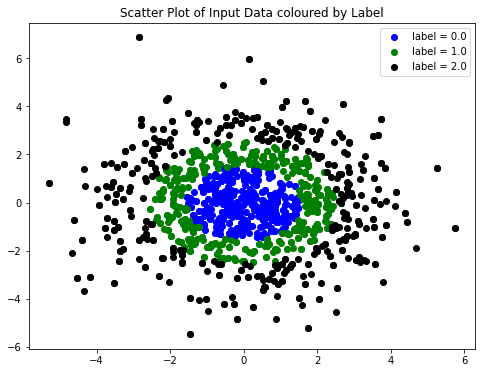

In [96]:
scatter_data(Xtrain, ytrain, color_dict_multi)

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [97]:
multiSVM = SVC(kernel= 'rbf')
multiSVM.fit(Xtrain, ytrain)
print(multiSVM.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Print the final accuracy on the test data.

In [98]:
acc_train = multiSVM.score(Xtrain, ytrain)
acc_test = multiSVM.score(Xtest, ytest)
print("Accuracy on Training Data: %0.4f" % acc_train)
print("Accuracy on Test Data: %0.4f" % acc_test)

Accuracy on Training Data: 0.9800
Accuracy on Test Data: 0.9680


Plot the scatter plot for the test data. On top of this scatter plot, plot the decision boundary.

Text(0.5, 1.0, 'RBF Multiclass SVM classifier: Test Accuracy = 0.9680')

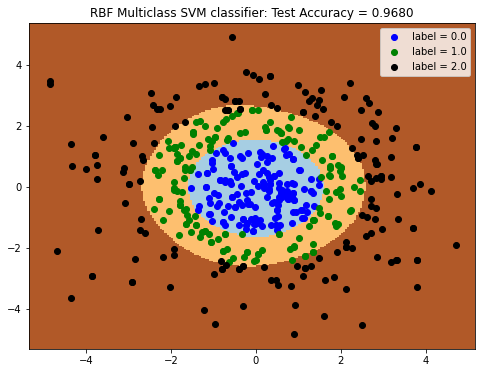

In [99]:
x_min, x_max = Xtest[:, 0].min() - .5, Xtest[:, 0].max() + .5
y_min, y_max = Xtest[:, 1].min() - .5, Xtest[:, 1].max() + .5
h = 0.05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xsamples = np.c_[xx.ravel(), yy.ravel()]
Z_rbf = multiSVM.predict(Xsamples)
Z_rbf = Z_rbf.reshape(xx.shape)
plt.figure(figsize= (8, 6))
plt.pcolormesh(xx, yy, Z_rbf, cmap=plt.cm.Paired)
legend_vec = []
for g in np.unique(ytest):
  ix = np.where(ytest == g)
  plt.scatter(Xtest[ix, 0], Xtest[ix, 1], c= color_dict_multi[g])
  legend_vec.append("label = "+ str(g))
plt.legend(legend_vec)
plt.title("RBF Multiclass SVM classifier: Test Accuracy = %0.4f" % acc_test)

# Problem 3 : Principal Component Analysis

#### In this exercise you will perform face recognition using eigenfaces. Face recognition can be formulated as a classification task, where the inputs are images and the outputs are people's names.

Load grayscale images from the LFW - Labeled faces in the Wild dataset using scikit-learn. To reduce the number of classes, retain pictures of only those people that have atleast 100 different pictures. (already done for you here) </br></br>
Report the number of images and the size of each image.

Number of Images:  1140
Size of image:  (62, 47)


Text(0.5, 1.0, 'Sample Image from the Dataset')

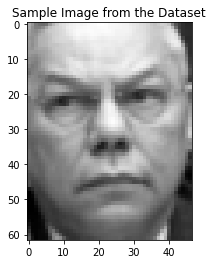

In [191]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
lfw_people = fetch_lfw_people(min_faces_per_person=100)
n_imgs, h, w = lfw_people.images.shape
print("Number of Images: ", n_imgs)
print("Size of image: ", (h, w))
plt.imshow(lfw_people.images[np.random.randint(n_imgs)], cmap= 'gray')
plt.title("Sample Image from the Dataset")

Split the dataset into training and test sets in the ratio - 7:3.

In [192]:
features = lfw_people.data
labels = lfw_people.target
label_names = lfw_people.target_names
num_feat = features.shape[1]
num_class = label_names.shape[0]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.3, train_size = 0.7)
print("Number of features: ", num_feat)
print("Number of classes: ", num_class)

Number of features:  2914
Number of classes:  5


Use scikit-learn's PCA class to perform dimensionality reduction on the training set images. Reduce the dimensions to 100 principal components. These principal components are the eigenfaces.

In [209]:
num_comp = 100
data_pca = PCA(n_components= num_comp).fit(Xtrain)
eigfaces = data_pca.components_

Reshape the principal eigenvectors into images and visualize the eigenfaces. Display 10 eigenfaces. 

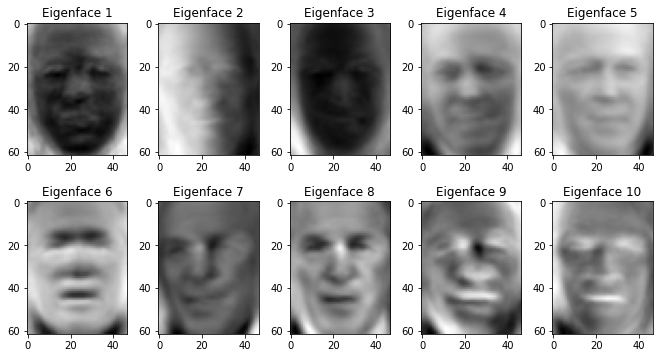

In [204]:
eigface_imgs = eigfaces.reshape((num_comp, h, w))
num_cols = 5; num_rows = 2
plt.figure(figsize=(1.8 * num_cols, 2.4 * num_rows))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(num_rows * num_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.imshow(eigface_imgs[i], cmap= "gray")
  plt.title("Eigenface " + str(i+1), size=12)

Reconstruct any image (from training / test set) by projecting the image onto the new eigenface space. </br>
*   Display the reconstructed image along with the original image.
*   Report the reconstruction mean squared error. 

Mean Squared Error = 75.9180


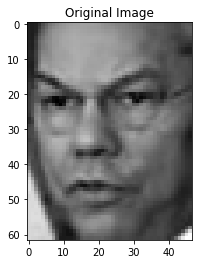

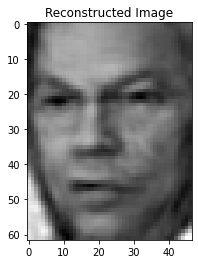

In [205]:
sample = lfw_people.images[np.random.randint(n_imgs)]
plt.figure()
plt.imshow(sample, cmap = "gray")
plt.title("Original Image")
# Projecting sample onto the eigenspace to extract the 100 most significant SVD components
sample_pca = data_pca.transform(sample.reshape(1, -1))   
# Reconstructing image using the PCA components
sample_recon = data_pca.inverse_transform(sample_pca)
sample_recon = sample_recon.reshape((h,w))
plt.figure()
plt.imshow(sample_recon, cmap = "gray")
plt.title("Reconstructed Image")
#
mse_recon = np.mean((sample- sample_recon)**2)
print("Mean Squared Error = %0.4f" % mse_recon)

Now that you have a reduced-dimensionality vector, train a single hidden layer neural network classifier with the person names as outputs and the reduced image vectors as input. You can use scikit-learn's MLPClassifier, with the number of neurons in the hidden layer set to 1024. 

In [206]:
Xtrain_pca = data_pca.transform(Xtrain)
Xtest_pca = data_pca.transform(Xtest)
mlp = MLPClassifier(hidden_layer_sizes= (1024, )).fit(Xtrain_pca, ytrain)

Now test your network's predictions on the test set and print out the precision, recall and support values for each class. Also display the images (say, 10 test images) along with the true and the  predicted label.

In [208]:
ypred = mlp.predict(Xtest_pca)
print("Classification Report: ")
clf_rep = classification_report(ytest, ypred, target_names= label_names)
print(clf_rep)
print("Confusion Matrix: ")
cnf_mat = confusion_matrix(ytest, ypred, labels = range(num_class))
print(cnf_mat)

Classification Report: 
                   precision    recall  f1-score   support

     Colin Powell       0.89      0.83      0.86        81
  Donald Rumsfeld       0.62      0.85      0.72        33
    George W Bush       0.87      0.90      0.89       147
Gerhard Schroeder       0.87      0.75      0.81        36
       Tony Blair       0.75      0.67      0.71        45

         accuracy                           0.83       342
        macro avg       0.80      0.80      0.79       342
     weighted avg       0.84      0.83      0.83       342

Confusion Matrix: 
[[ 67   6   3   1   4]
 [  2  28   3   0   0]
 [  5   5 132   1   4]
 [  1   2   4  27   2]
 [  0   4   9   2  30]]


Repeat all the above steps for different values of number of principal components or eigen faces - 100, 150 and 200. Explain the change in the proportion of the total variance explained by the eigenfaces and reconstruction mean squared error with increase in the number of eigenfaces.

In [222]:
def vary_components(num_comp, sample):
  data_pca = PCA(n_components= num_comp).fit(Xtrain)
  eigfaces = data_pca.components_
  Xtrain_pca = data_pca.transform(Xtrain)
  Xtest_pca = data_pca.transform(Xtest)
  sample_pca = data_pca.transform(sample.reshape(1, -1))   
  sample_recon = data_pca.inverse_transform(sample_pca).reshape((h,w))
  mse_recon = np.mean((sample- sample_recon)**2)
  print("PCA decomposition: # of components = ", num_comp)
  print("\nMean Squared Error in Reconstruction = %0.4f" % mse_recon)
  mlp = MLPClassifier(hidden_layer_sizes= (1024, )).fit(Xtrain_pca, ytrain)
  ypred = mlp.predict(Xtest_pca)    
  print("Classification Report: ")
  clf_rep = classification_report(ytest, ypred, target_names= label_names)
  print(clf_rep)
sample = lfw_people.images[np.random.randint(n_imgs)]    
for i in np.array([50, 100, 150, 200, 500]):
  vary_components(i, sample)

PCA decomposition: # of components =  50

Mean Squared Error in Reconstruction = 180.0431
Classification Report: 
                   precision    recall  f1-score   support

     Colin Powell       0.85      0.86      0.86        81
  Donald Rumsfeld       0.61      0.58      0.59        33
    George W Bush       0.86      0.91      0.89       147
Gerhard Schroeder       0.78      0.50      0.61        36
       Tony Blair       0.65      0.73      0.69        45

         accuracy                           0.80       342
        macro avg       0.75      0.72      0.73       342
     weighted avg       0.80      0.80      0.80       342

PCA decomposition: # of components =  100

Mean Squared Error in Reconstruction = 103.8204
Classification Report: 
                   precision    recall  f1-score   support

     Colin Powell       0.85      0.74      0.79        81
  Donald Rumsfeld       0.74      0.70      0.72        33
    George W Bush       0.85      0.90      0.88       147


### Remarks:

As is clear from the output, as the number of PCA components is increased, the MSE of Reconstruction of images, reduces significantly as expected. This is because the low rank (or low dimension) approximation of the images leave out minor variations in the image, which contribute to the error.

However, it is interesting to note that the precision and recall of MLP classifier on the test dataset do not improve significantly beyond 100 components. This too, is as expected because the top 100 hold most of the relevant information in the images which is sufficient for classification.



Bonus : Try using eigenfaces to recognize images of animal faces.
